# Zbiór danych

Ten zestaw danych zawiera kompleksowe informacje o dziennych statystykach dotyczących akcji Apple Inc. (AAPL) w okresie od 2010 do 2020 roku. Dane obejmują takie wskaźniki, jak cena zamknięcia, cena otwarcia, najwyższa i najniższa cena w ciągu dnia, a także wolumen obrotu. Zestaw obejmuje 2417 dni handlowych, z roczną liczbą dni handlowych wahającą się od 250 do 254, w zależności od roku.

Zbiór danych zawiera następujące kolumny:
- Data: Dzień handlowy.
- Cena zamknięcia: Cena akcji na koniec dnia handlowego.
- Wolumen obrotu: Całkowita liczba akcji wymienionych w ciągu danego dnia.
- Cena otwarcia: Cena akcji na początku dnia handlowego.
- Najwyższa cena: Maksymalna cena akcji w ciągu dnia handlowego.
- Najniższa cena: Minimalna cena akcji w ciągu dnia handlowego.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, shapiro, mannwhitneyu, f_oneway
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv(r"C:\Users\tomek\Downloads\HistoricalQuotes.csv")
data

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23
...,...,...,...,...,...,...
2513,03/05/2010,$31.2786,224647427,$30.7057,$31.3857,$30.6614
2514,03/04/2010,$30.1014,89591907,$29.8971,$30.1314,$29.8043
2515,03/03/2010,$29.9043,92846488,$29.8486,$29.9814,$29.7057
2516,03/02/2010,$29.8357,141486282,$29.99,$30.1186,$29.6771


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         2518 non-null   object
 1    Close/Last  2518 non-null   object
 2    Volume      2518 non-null   int64 
 3    Open        2518 non-null   object
 4    High        2518 non-null   object
 5    Low         2518 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.2+ KB


In [ ]:
# Usuń spacje z nazw kolumn
data.columns = data.columns.str.strip()

# Usuń znak dolara i konwertuj na liczby zmiennoprzecinkowe
data['Close/Last'] = data['Close/Last'].str.strip().str.replace(r'\$', '', regex=True).astype(float)
data['Open'] = data['Open'].str.strip().str.replace(r'\$', '', regex=True).astype(float)
data['High'] = data['High'].str.strip().str.replace(r'\$', '', regex=True).astype(float)
data['Low'] = data['Low'].str.strip().str.replace(r'\$', '', regex=True).astype(float)


In [ ]:
data

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,273.3600,106721200,257.2600,278.4100,256.3700
1,02/27/2020,273.5200,80151380,281.1000,286.0000,272.9600
2,02/26/2020,292.6500,49678430,286.5300,297.8800,286.5000
3,02/25/2020,288.0800,57668360,300.9500,302.5300,286.1300
4,02/24/2020,298.1800,55548830,297.2600,304.1800,289.2300
...,...,...,...,...,...,...
2513,03/05/2010,31.2786,224647427,30.7057,31.3857,30.6614
2514,03/04/2010,30.1014,89591907,29.8971,30.1314,29.8043
2515,03/03/2010,29.9043,92846488,29.8486,29.9814,29.7057
2516,03/02/2010,29.8357,141486282,29.9900,30.1186,29.6771


In [ ]:
# Wyznaczanie podstawowych parametrów statystycznych
basic_stats = data.describe()
print("Podstawowe parametry statystyczne:")
print(basic_stats)


Podstawowe parametry statystyczne:
        Close/Last        Volume         Open         High          Low
count  2518.000000  2.518000e+03  2518.000000  2518.000000  2518.000000
mean    114.769522  7.258009e+07   114.728443   115.766415   113.690582
std      60.662405  5.663113e+07    60.546893    61.134456    60.085105
min      29.835700  1.136205e+07    29.392800    29.928600    28.464300
25%      66.822475  3.053026e+07    66.877150    67.475300    66.372950
50%     101.090000  5.295469e+07   101.115000   102.085000   100.350000
75%     154.630000  9.861006e+07   154.610000   155.735000   153.325000
max     327.200000  4.624423e+08   324.740000   327.850000   323.350000


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

data['Year'] = data['Date'].dt.year

# Wybieranie danych z poszczególnych lat
data_2020 = data[data['Year'] == 2020]['Close/Last']
data_2019 = data[data['Year'] == 2019]['Close/Last']
data_2018 = data[data['Year'] == 2018]['Close/Last']
data_2017 = data[data['Year'] == 2017]['Close/Last']
data_2016 = data[data['Year'] == 2016]['Close/Last']


data

,Date,Close/Last,Volume,Open,High,Low,Year
0,2020-02-28,273.3600,106721200,257.2600,278.4100,256.3700,2020
1,2020-02-27,273.5200,80151380,281.1000,286.0000,272.9600,2020
2,2020-02-26,292.6500,49678430,286.5300,297.8800,286.5000,2020
3,2020-02-25,288.0800,57668360,300.9500,302.5300,286.1300,2020
4,2020-02-24,298.1800,55548830,297.2600,304.1800,289.2300,2020
...,...,...,...,...,...,...,...
2513,2010-03-05,31.2786,224647427,30.7057,31.3857,30.6614,2010
2514,2010-03-04,30.1014,89591907,29.8971,30.1314,29.8043,2010
2515,2010-03-03,29.9043,92846488,29.8486,29.9814,29.7057,2010
2516,2010-03-02,29.8357,141486282,29.9900,30.1186,29.6771,2010


## Testy parametryczne: test T-studenta
Test T-Studenta to statystyczna metoda służąca do porównywania średnich w próbach, zakładająca normalny rozkład danych i homogeniczność wariancji. Do tego celu użyliśmy danych cen giełodwych z roku 2019 i 2020.

#### Hipoteza zerowa (H₀): Średnia cen giełdowych w roku 2020 nie różni się istotnie względem cen giełdowych w roku 2019
#### Hipoteza alternatywna (H₁): Średnia cen giełdowych w roku 2020 jest istotnie wieksza od cen giełdowych w 2019

### Sprawdzenie normalności rozkładu (testem Shapiro-Wilka)

Celem testu Shapiro-Wilka jest sprawdzenie, czy dane pochodzą z rozkładu normalnego. Jest to popularny test statystyczny używany w analizie danych, zwłaszcza przed stosowaniem testów parametrycznych, które zakładają normalność rozkładu

#### Hipoteza zerowa (H₀): Dane mają rozkład normalny
#### Hipoteza alternatywna (H₁): Dane nie mają rozkładu normalnego

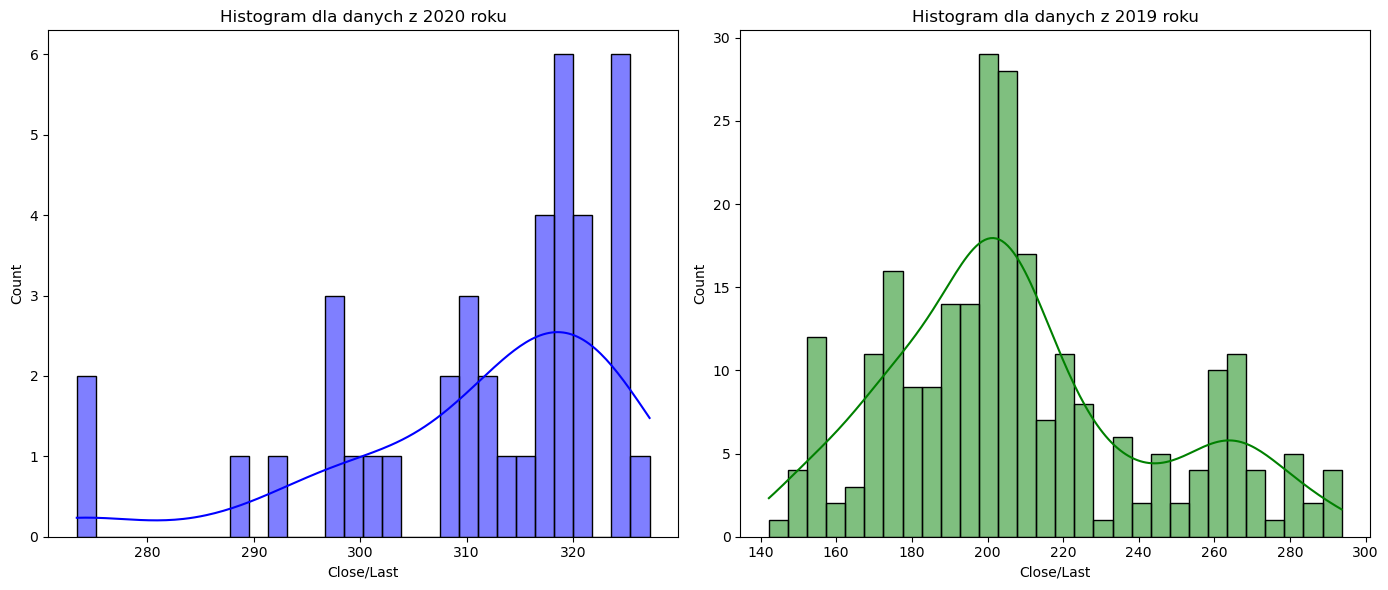

Test normalności dla danych z 2020 roku: Statystyka = 0.8593701124191284, p-value = 0.0001531545858597383
Test normalności dla danych z 2019 roku: Statystyka = 0.9505143761634827, p-value = 1.4964182071253163e-07


In [ ]:
# Tworzenie histogramów dla danych z 2020 i 2019 roku
plt.figure(figsize=(14, 6))

# Histogram dla danych z 2020 roku
plt.subplot(1, 2, 1)
sns.histplot(data_2020, kde=True, color='blue', bins=30)
plt.title('Histogram dla danych z 2020 roku')

# Histogram dla danych z 2019 roku
plt.subplot(1, 2, 2)
sns.histplot(data_2019, kde=True, color='green', bins=30)
plt.title('Histogram dla danych z 2019 roku')

plt.tight_layout()
plt.show()

# Test normalności (test Shapiro-Wilka)
shapiro_test_2020 = stats.shapiro(data_2020)
shapiro_test_2019 = stats.shapiro(data_2019)

print(f"Test normalności dla danych z 2020 roku: Statystyka = {shapiro_test_2020[0]}, p-value = {shapiro_test_2020[1]}")
print(f"Test normalności dla danych z 2019 roku: Statystyka = {shapiro_test_2019[0]}, p-value = {shapiro_test_2019[1]}")

## Wnioski
Test normalności dla danych z 2020 roku:
Statystyka testu: 0.85937
p-value: 0.000153
Interpretacja:
Test Shapiro-Wilka ma hipotezę zerową, która mówi, że dane mają rozkład normalny. Jeśli wartość p jest mniejsza niż wybrany poziom istotności (zwykle 0.05), odrzucamy hipotezę zerową i wnioskujemy, że dane nie mają rozkładu normalnego.
Wartość p = 0.000153 jest znacznie mniejsza niż 0.05, więc odrzucamy hipotezę o normalności i stwierdzamy, że dane z 2020 roku nie mają rozkładu normalnego.


Test normalności dla danych z 2019 roku:
Statystyka testu: 0.94248
p-value: 5.0134e-30 (czyli bardzo bliskie 0)
Interpretacja:
Tak jak w poprzednim przypadku, wartość p jest znacznie mniejsza niż 0.05. Wartość p jest bliska zeru, co oznacza, że odrzucamy hipotezę o normalności i wnioskujemy, że dane z 2019 roku również nie mają rozkładu normalnego.

W obu przypadkach (2019 i 2020 rok) p-value jest znacznie mniejsze niż 0.05, co prowadzi do wniosku, że dane nie są rozkładem normalnym. Oznacza to, że nie możemy przyjąć założenia o normalności tych danych, co może sugerować, że rozkład cen akcji w tych latach jest inny. Więc odrzucamy hiptoze zerową 

## Test Levene’a (Homogeniczność wariancji)
Test Levene’a sprawdza, czy wariancje w dwóch (lub więcej) grupach są równe. Hipotezy dla tego testu są następujące:

#### Hipoteza zerowa (H₀): Wariancje są równe.
#### Hipoteza alternatywna (H₁): Wariancje są różne.

In [ ]:
# Przeprowadź test Levene’a dla danych z 2020 i 2019 roku
levene_stat, p_value_levene = stats.levene(data_2020, data_2019)

# Wydrukuj wyniki
print(f"Statystyka testu Levene’a: {levene_stat}")
print(f"p-value testu Levene’a: {p_value_levene}")

# Sprawdzanie hipotezy zerowej
if p_value_levene < 0.05:
    print("Odrzucamy hipotezę zerową: Istnieje istotna różnica między wariancjami.")
else:
    print("Nie ma podstaw do odrzucenia hipotezy zerowej: Wariancje są równe.")

Statystyka testu Levene’a: 19.585724851633252
p-value testu Levene’a: 1.3630027090912984e-05
Odrzucamy hipotezę zerową: Istnieje istotna różnica między wariancjami.


#  T-test 
T- testu nie można przeprowadzić 

# Testy nieparametryczne: Test U Manna–Whitneya

Test Manna-Whitneya – nieparametryczny odpowiednik testu t Studenta dla prób niezależnych. Stosujemy go, gdy chcemy porównać dwie grupy pod względem jakiejś zmiennej ilościowej, dokładnie tak jak w przypadku wspomnianego testu t Studenta, oraz gdy założenie normalności rozkładu nie jest spełnione

#### Hipoteza zerowa (H₀): Rozkłady cen akcji w dwóch latach (2019 i 2020) są takie same.
#### Hipoteza alternatywna (H₁): Rozkłady cen akcji w dwóch latach różnią się.

In [ ]:
# Test U Manna-Whitneya
stat, p_value = mannwhitneyu(data_2020, data_2019, alternative='two-sided')

# Wyniki testu
print("Statystyka testu U Manna-Whitneya:", stat)
print("p-value:", p_value)

# Podsumowanie wyników
if p_value < 0.05:
    print("Odrzucamy hipotezę zerową: Istnieje istotna różnica między cenami akcji w 2019 i 2020 roku.")
else:
    print("Brak podstaw do odrzucenia hipotezy zerowej: Nie ma istotnej różnicy między cenami akcji w 2019 i 2020 roku.")

Statystyka testu U Manna-Whitneya: 10051.0
p-value: 5.5422059857964814e-24
Odrzucamy hipotezę zerową: Istnieje istotna różnica między cenami akcji w 2019 i 2020 roku.


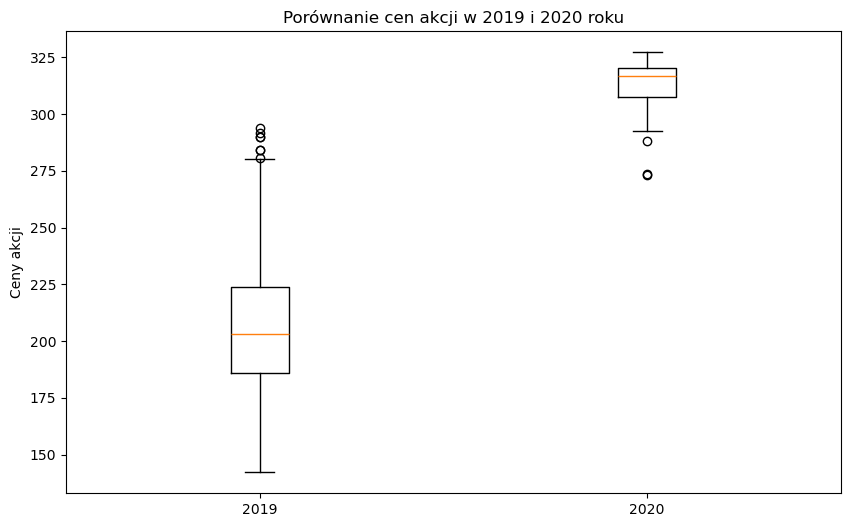

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot([data_2019 , data_2020], labels=['2019', '2020', ])
plt.title('Porównanie cen akcji w 2019 i 2020 roku')
plt.ylabel('Ceny akcji')
plt.show()

Istnieje istotna statystycznie różnica w rozkładzie cen akcji między 2019 a 2020 rokiem. Wskazuje to na zmianę w cenach akcji w tych latach, co może być związane z różnymi czynnikami rynkowymi lub wydarzeniami w analizowanym okresie. Wykres potwierdza wyniki testu U Manna-Whitneya. Różnice w medianach oraz rozkładach danych dla obu lat są wyraźne, co tłumaczy istotność statystyczną testu (odrzucenie hipotezy zerowej)

# Test ANOVA
Test analizy wariancji (ANalysis Of VAriance) jest statystyczną metodą używaną do porównywania średnich wartości między trzema lub więcej grupami.
W jednoczynnikowym ANOVA zakładamy, że dane w każdej grupie pochodząz populacji o rozkładzie normalnym i mają jednakowe wariancje.

Nie można przeprowadzić klasycznego testu ANOVA dla naszego zbioru , ponieważ:

- Brak normalności rozkładu danych w grupach: Test normalności wykazał, że dane w poszczególnych latach (2018, 2019, 2020) nie pochodzą z rozkładu normalnego. To narusza jedno z podstawowych założeń ANOVA.

- Różnice w wariancjach (brak homogeniczności): Test Levene’a wykazał istotne różnice w wariancjach między grupami, co również narusza założenia ANOVA.

Te dwa warunki sprawiają, że wyniki klasycznego testu ANOVA byłyby niestabilne i niewiarygodne. W dalszej części przeprowadzimy nieparametryczny odpowiednik testu który ma mniej warunków.

# Test ANOVA Kruskella-Wallisa
Test Kruskala-Wallisa jest nieparametrycznym testem statystycznym. Jest to odpowiednik testu ANOVA w przypadku, gdy założenie o normalności danych nie jest spełnione. Stosujemy go, gdy chcemy porównać co najmniej trzy grupy pod względem jakiejś zmiennej ilościowej.

#### Hipoteza zerowa (H₀): Wszystkie grupy (2018, 2019, 2020) pochodzą z tego samego rozkładu (nie ma różnicy między cenami akcji w tych trzech latach).
#### Hipoteza alternatywna (H₁): Przynajmniej jedna z grup (2018, 2019, 2020) pochodzi z innego rozkładu (istnieje różnica między cenami akcji w co najmniej jednym z tych trzech lat).

In [ ]:
# Test Kruskala-Wallisa (porównanie trzech grup)
stat, p_value = stats.kruskal(data_2018, data_2019, data_2020)

# Wyniki testu
print(f"Statystyka testu: {stat}")
print(f"p-value: {p_value}")

# Interpretacja wyniku
if p_value < 0.05:
    print("Odrzucamy hipotezę zerową: Istnieje istotna różnica między cenami akcji w 2018, 2019 i 2020 roku.")
else:
    print("Nie ma podstaw do odrzucenia hipotezy zerowej: Ceny akcji w 2018, 2019 i 2020 roku są podobne.")

Statystyka testu: 145.7136259331876
p-value: 2.2839582429733494e-32
Odrzucamy hipotezę zerową: Istnieje istotna różnica między cenami akcji w 2018, 2019 i 2020 roku.


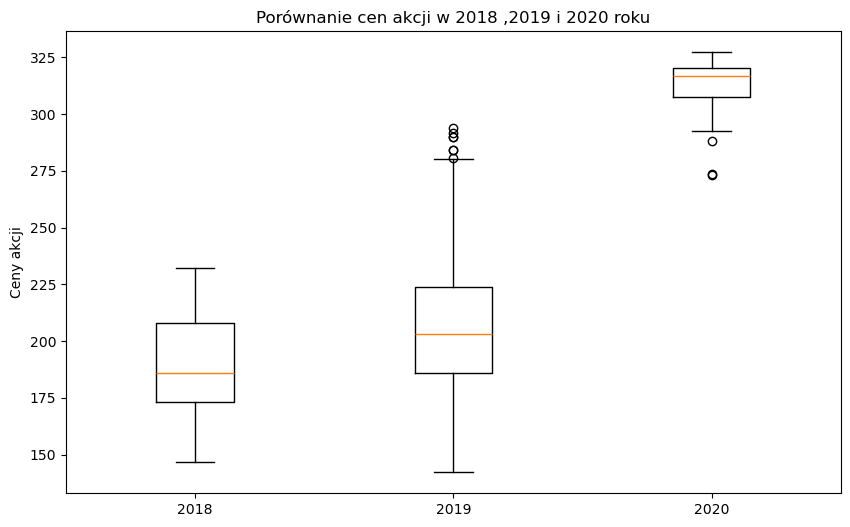

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot([data_2018, data_2019 , data_2020], labels=['2018', '2019', '2020'])
plt.title('Porównanie cen akcji w 2018 ,2019 i 2020 roku')
plt.ylabel('Ceny akcji')
plt.show()

## Wnioski

Widzimy, że ceny akcji w tych latach nie są jednorodne i różnią się istotnie. Na podstawie wyników testu Kruskala-Wallisa, możemy wyciągnąć wniosek, że ceny akcji w tych trzech latach różnią się od siebie, co może sugerować wpływ różnych czynników ekonomicznych na te grupy w różnych latach. Z wykresu można wyciągnąć wniosek, że różnice w cenach akcji między latami są nie tylko statystycznie istotne, ale również widoczne wizualnie: ceny akcji stopniowo rosły, osiągając najwyższy poziom w 2020 roku.

# Analiza regresji liniowej- regresja wieloraka


Regresja wieloraka pozwala na modelowanie związku między jedną zmienną zależną a wieloma zmiennymi niezależnymi. Celem regresji wielorakiej jest przewidywanie wartości zmiennej zależnej na podstawie zmian w wielu zmiennych niezależnych jednocześnie.

#### Hipoteza zerowa (H₀): Ceny akcji z lat 2016-2019 znacząco wpływają na ceny akcji w 2020 roku 
#### Hipoteza alternatywna (H₁):  Ceny akcji z lat 2016-2019 roku nie mają znaczącego wpływu na ceny akcji w 2020 roku 

In [ ]:

min_len = min(len(data_2019), len(data_2020),len(data_2018),len(data_2017),len(data_2016))

data_2016 = data_2016[:min_len]
data_2017 = data_2017[:min_len]
data_2018 = data_2018[:min_len]
data_2019 = data_2019[:min_len]
data_2020 = data_2020[:min_len]



X = pd.DataFrame({
    'Price_2019': data_2019.values,
    'Price_2018': data_2018.values,
    'Price_2017': data_2017.values,
    'Price_2016': data_2016.values
})  # zmienne niezależne
y = data_2020.values  # Zmienna zależna


model = LinearRegression()
model.fit(X, y)


y_pred = model.predict(X)

# Współczynnik R-kwadrat
r2 = r2_score(y, y_pred)


print("Współczynniki nachylenia (beta):", model.coef_)
print("Współczynnik R-kwadrat:", r2)



Współczynniki nachylenia (beta): [-1.41707716 -0.61448998  0.35359861  0.38044635]
Współczynnik R-kwadrat: 0.3658577655986355


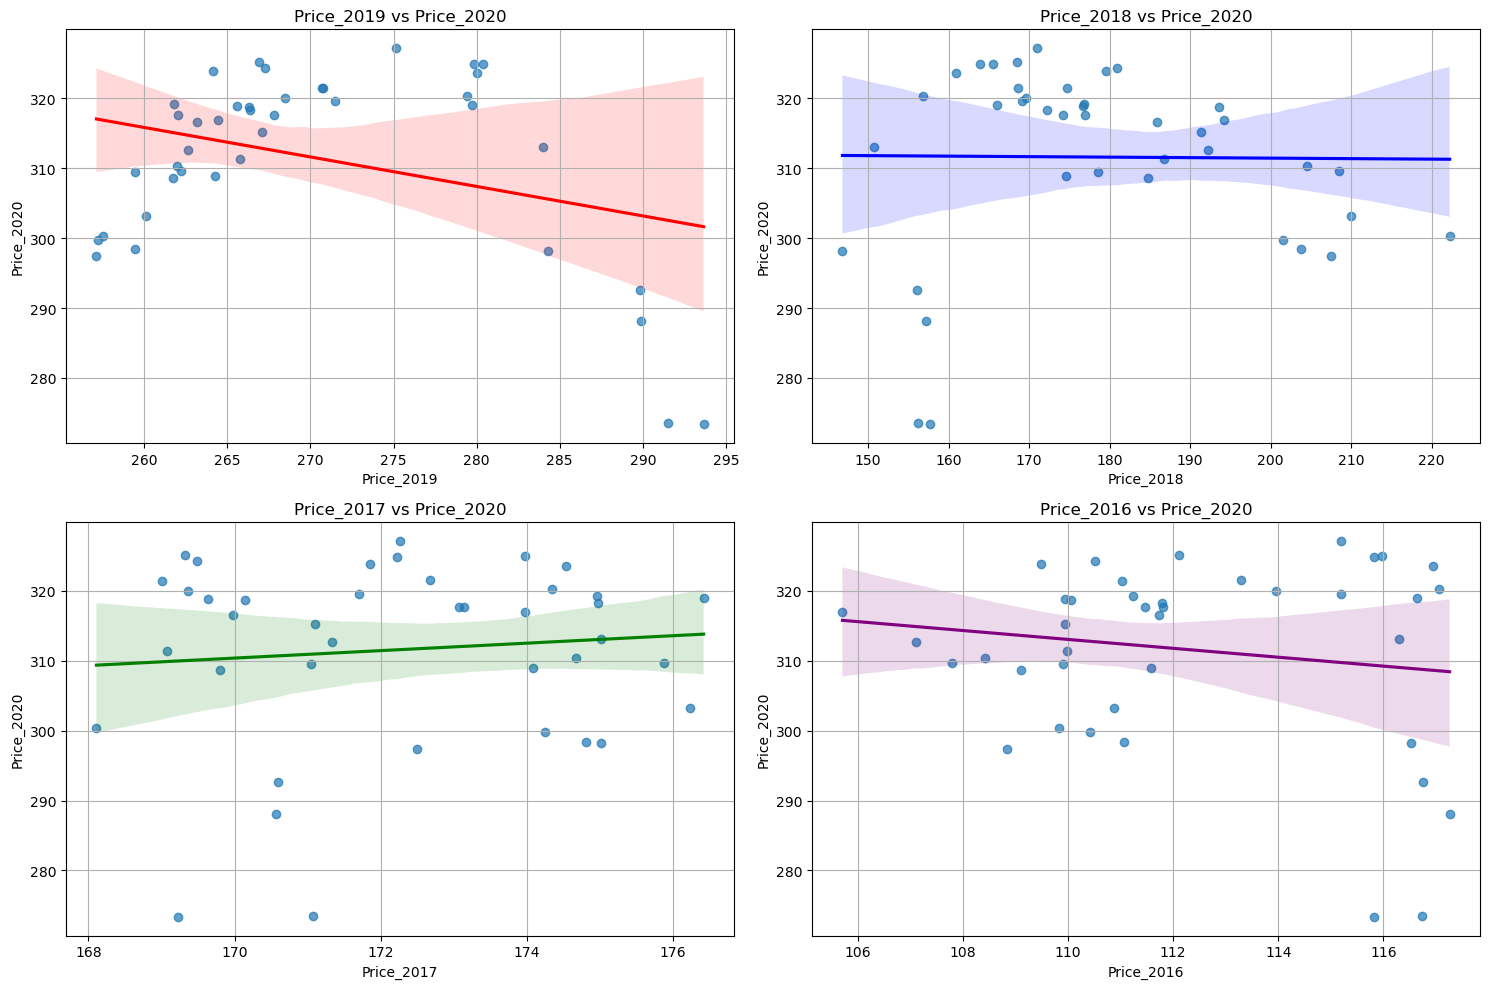

In [ ]:
# Wykresy rozrzutu
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.regplot(x=X['Price_2019'], y=y, ci=95, line_kws={"color": "red"}, scatter_kws={"alpha": 0.7})
plt.title("Price_2019 vs Price_2020", fontsize=12)
plt.xlabel("Price_2019", fontsize=10)
plt.ylabel("Price_2020", fontsize=10)
plt.grid(True)


plt.subplot(2, 2, 2)
sns.regplot(x=X['Price_2018'], y=y, ci=95, line_kws={"color": "blue"}, scatter_kws={"alpha": 0.7})
plt.title("Price_2018 vs Price_2020", fontsize=12)
plt.xlabel("Price_2018", fontsize=10)
plt.ylabel("Price_2020", fontsize=10)
plt.grid(True)


plt.subplot(2, 2, 3)
sns.regplot(x=X['Price_2017'], y=y, ci=95, line_kws={"color": "green"}, scatter_kws={"alpha": 0.7})
plt.title("Price_2017 vs Price_2020", fontsize=12)
plt.xlabel("Price_2017", fontsize=10)
plt.ylabel("Price_2020", fontsize=10)
plt.grid(True)


plt.subplot(2, 2, 4)
sns.regplot(x=X['Price_2016'], y=y, ci=95, line_kws={"color": "purple"}, scatter_kws={"alpha": 0.7})
plt.title("Price_2016 vs Price_2020", fontsize=12)
plt.xlabel("Price_2016", fontsize=10)
plt.ylabel("Price_2020", fontsize=10)
plt.grid(True)


plt.tight_layout()
plt.show()


## Wnioski

Wykresy regresji wielorakiej wskazują na to, iż ceny akcji w poprzednich latach  mają zróżnicowany wpływ na ceny w roku 2020.                         Niski współczynnik R-kwadrat sugeruje odrzucenie hipotezy zerowej. Ceny w latach 2016-2019 nie mają znaczącego wpływu na ceny w roku 2020.